# Welcome to My Capstone Analysis Page!

> This page will contain any and all analysis I am making on my datasets. Feel free to follow along!

### Imports

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor

### Reading in CSVs

In [2]:
contracts = pd.read_csv('capstone/datasets/atl_player_contracts.csv')
contracts = contracts.rename(columns = {'Player':'Name'})
contracts.head()

Name  Age Position   Status  Total Salary  Contract Length  \
0        Matt Olson   29       IF  Veteran     168000000                8   
1  Ronald Acuna Jr.   25       OF  Veteran     100000000                8   
2   Raisel Iglesias   33       RP  Veteran      58000000                4   
3     Marcell Ozuna   32       OF  Veteran      65000000                4   
4      Austin Riley   26       IF  Veteran     212000000                8   

   Average Yearly Salary  
0               21000000  
1               12500000  
2               14500000  
3               16250000  
4               21200000

In [3]:
batting = pd.read_csv('capstone/datasets/atl_batting_statistics.csv')
batting.head()

Name    G   PA   AB    R    H  2B  3B  HR  RBI  ...    OBP    SLG  \
0    Sean Murphy  108  438  370   65   93  21   0  21   68  ...  0.365  0.478   
1     Matt Olson  162  720  608  127  172  27   3  54  139  ...  0.389  0.604   
2   Ozzie Albies  148  660  596   96  167  30   5  33  109  ...  0.336  0.513   
3  Orlando Arcia  139  533  488   66  129  25   0  17   65  ...  0.321  0.420   
4   Austin Riley  159  715  636  117  179  32   3  37   97  ...  0.345  0.516   

     OPS  OPS+   TB  GDP  HBP  SH  SF  IBB  
0  0.844   125  177   18   18   0   1    0  
1  0.993   162  367   13    4   0   4    8  
2  0.849   124  306    9    8   0   8    2  
3  0.741    98  205   14    3   0   3    0  
4  0.861   128  328   18    9   0  11    4  

[5 rows x 25 columns]

In [4]:
fielding = pd.read_csv('capstone/datasets/atl_fielding_statistics.csv')
fielding.head()

Name    G   GS   CG     Inn   Ch   PO    A   E  DP  ...  Rgood  \
0  Ronald Acuna Jr.  157  157  147  1361.0  296  281   10   5   1  ...    1.0   
1      Ozzie Albies  148  148  146  1314.0  587  211  368   8  79  ...    0.0   
2      Kolby Allard    4    3    0    12.1    0    0    0   0   0  ...    NaN   
3     Nick Anderson   35    0    0    35.1    2    2    0   0   0  ...    0.0   
4     Orlando Arcia  139  136  134  1210.0  518  184  322  12  69  ...    1.0   

   RF/9  RF/G  PB   WP   SB   CS   CS%  lgCS%  PO.1  
0  1.92  1.84 NaN  NaN  NaN  NaN   NaN    NaN   NaN  
1  3.97  3.91 NaN  NaN  NaN  NaN   NaN    NaN   NaN  
2  0.00  0.00 NaN  1.0  1.0  0.0    0%    19%   0.0  
3  0.51  0.06 NaN  1.0  0.0  2.0  100%    19%   0.0  
4  3.76  3.64 NaN  NaN  NaN  NaN   NaN    NaN   NaN  

[5 rows x 25 columns]

In [5]:
pitching = pd.read_csv('capstone/datasets/atl_pitching_statistics.csv')
pitching.head()

Name   W   L   W-L%   ERA   G  GS  GF  CG  SHO  ...  WP   BF  \
0  Spencer Strider  20   5  0.800  3.86  32  32   0   0    0  ...   6  763   
1      Bryce Elder  12   4  0.750  3.81  31  31   0   0    0  ...  11  732   
2   Charlie Morton  14  12  0.538  3.64  30  30   0   0    0  ...   4  716   
3        Max Fried   8   1  0.889  2.55  14  14   0   1    1  ...   3  311   
4  Raisel Iglesias   5   4  0.556  2.75  58   0  50   0    0  ...   0  231   

    ERA+   FIP   WHIP   H9  HR9  BB9   SO9  SO/W  
0  115.0  2.85  1.093  7.0  1.1  2.8  13.5  4.84  
1  116.0  4.42  1.277  8.2  1.0  3.2   6.6  2.03  
2  122.0  3.87  1.427  8.3  0.8  4.6  10.1  2.20  
3  174.0  3.14  1.133  8.1  0.8  2.1   9.3  4.44  
4  162.0  3.26  1.186  8.2  1.1  2.4  11.0  4.53  

[5 rows x 31 columns]

### Merging the data together

In [6]:
# Merge fielding DataFrame with contracts
fielding_merged = pd.merge(fielding, contracts, on='Name', how='inner')

# Merge batting DataFrame with contracts
batting_merged = pd.merge(batting, contracts, on='Name', how='inner')

# Merge pitching DataFrame with contracts
pitching_merged = pd.merge(pitching, contracts, on='Name', how='inner')

# Merge batting and pitching DataFrames with the fielding DataFrame
df = pd.merge(fielding_merged, batting_merged, on='Name', how='outer')
df = pd.merge(df, pitching_merged, on='Name', how='outer')

In [7]:
# Starting pitcher Kyle Wright is listed as an OF. He needs to be a SP.
df.loc[35, 'Position_x'] = 'SP'

In [8]:
df1 = df.sort_values(by = 'Position_x')

In [9]:
file_path = 'capstone/datasets/dataframe.csv'
df1.to_csv(file_path, index = False)

### Dropping Unnecessary/Repeated Columns

In [10]:
df1.shape

(37, 97)

In [11]:
df1 = df1.drop('G_y',axis = 1)

In [12]:
df1 = df1.drop('SB_x', axis = 1)

In [13]:
df1 = df1.drop('CS_x', axis = 1)

In [14]:
df1 = df1.drop('CS%', axis = 1)

In [15]:
df1 = df1.drop('lgCS%', axis = 1)

In [16]:
df1 = df1.drop('PO.1', axis = 1)

In [17]:
df1 = df1.drop('Rgood', axis = 1)

In [18]:
df1 = df1.drop('PB', axis = 1)

In [19]:
df1 = df1.drop('IBB_x', axis = 1)

In [20]:
df1 = df1.drop('Age_y', axis = 1)

In [21]:
df1 = df1.drop('Position_y', axis = 1)

In [22]:
df1 = df1.drop('Status_y', axis = 1)

In [23]:
df1 = df1.drop('Total Salary_y', axis = 1)

In [24]:
df1 = df1.drop('Contract Length_y', axis = 1)

In [25]:
df1 = df1.drop('Average Yearly Salary_y', axis = 1)

In [26]:
df1 = df1.drop('GS_y', axis = 1)

In [27]:
df1 = df1.drop('CG_y', axis = 1)

In [28]:
df1 = df1.drop('SHO', axis = 1)

In [29]:
df1 = df1.drop('IBB_y', axis = 1)

In [30]:
df1 = df1.drop('HBP_y', axis = 1)

In [31]:
df1 = df1.drop('BK', axis = 1)

In [32]:
df1 = df1.drop('WP_y', axis = 1)

In [33]:
df1 = df1.drop('Age', axis = 1)

In [34]:
df1 = df1.drop('Position', axis = 1)

In [35]:
df1 = df1.drop('Status', axis = 1)

In [36]:
df1 = df1.drop('Total Salary', axis = 1)

In [37]:
df1 = df1.drop('Contract Length', axis = 1)

In [38]:
df1 = df1.drop('Average Yearly Salary', axis = 1)

In [39]:
df1 = df1.drop('WP_x', axis = 1)

In [40]:
df1.shape

(37, 68)

In [41]:
# Checking new CSV
path = 'capstone/datasets/newdataframe.csv'
df1.to_csv(path, index = False)

### Renaming Columns

In [42]:
# H_x is batters' hits and H_y is pitchers' allowed hits
# R_x is runs scored by batters and R_y is allowed runs by pitchers
# BB_x is the amount of times batters were walked and BB_y is the amount of times pitchers walked opposing batters
# SO_x is the amount of times batters struck out and SO_y is the amount of times pitchers struck out opposing batters

In [43]:
df1 = df1.rename(columns = {'G_x':'Games Played','GS_x':'Games Started','CG_x':'Complete Games','PO':'Putouts','E':'Errors','Age_x':'Age','Position_x':'Position',
                           'Status_x':'Status','Contract Length_x':'Contract Length','Average Yearly Salary_x':'Average Yearly Salary','R_x':'Runs Scored',
                           'H_x': 'Hits','HR_x':'HR','SB_y':'SB','BB_x':'BB','SO':'Batter SO','H_y':'Hits Allowed','R_y':'Runs Allowed','HR_y':'Home Runs Allowed',
                           'BB_y':'BB Allowed','SO_y':'SO','Total Salary_x':'Total Salary'})

In [44]:
# Checking new CSV
path = 'capstone/datasets/newdataframe.csv'
df1.to_csv(path, index = False)

### Filling in Null Values

In [45]:
df1 = df1.fillna(0)

### Getting Dummies of Status

In [46]:
df1 = pd.get_dummies(df1, columns = ['Status'], dtype = int)

In [47]:
df1.head()

Name  Games Played  Games Started  Complete Games     Inn   Ch  \
6   Travis d'Arnaud            63             59              56   530.0  580   
22      Sean Murphy           102             98              93   866.0  959   
18      Nicky Lopez            25             19              14   174.1   83   
1      Ozzie Albies           148            148             146  1314.0  587   
34    Luke Williams             4              1               1    17.0    8   

    Putouts    A  Errors  DP  ...   WHIP    H9  HR9  BB9  SO9  SO/W  \
6       563   12       5   1  ...  0.000   0.0  0.0  0.0  0.0   0.0   
22      919   30      10   2  ...  0.000   0.0  0.0  0.0  0.0   0.0   
18       32   50       1  14  ...  2.571  15.4  3.9  7.7  0.0   0.0   
1       211  368       8  79  ...  0.000   0.0  0.0  0.0  0.0   0.0   
34        5    3       0   0  ...  0.000   0.0  0.0  0.0  0.0   0.0   

    Status_Arbitration Year 2  Status_Arbitration Year 3  \
6                           0                          0   
22                          0                          0   
18                          1                          0   
1                           0                          0   
34                          0                          0   

   Status_Pre-Arbitration  Status_Veteran  
6                       0               1  
22                      0               1  
18                      0               0  
1                       0               1  
34                      1               0  

[5 rows x 71 columns]

In [48]:
# Checking new CSV
path = 'capstone/datasets/newdataframe.csv'
df1.to_csv(path, index = False)

## Predictive Modeling/EDA

### Baseline model

In [49]:
baseline = df1['Average Yearly Salary'].mean()
predicted_values = np.full_like(df1['Average Yearly Salary'], fill_value=baseline)
r2_score(df1['Average Yearly Salary'], predicted_values)

-5.10702591327572e-15

In [50]:
np.sqrt(mean_squared_error(df1['Average Yearly Salary'], predicted_values))

6336312.9456375

### Some EDA

In [64]:
sns.pairplot(df1,corner = True)

/Users/mattnitkowski/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/mattnitkowski/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/mattnitkowski/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/mattnitkowski/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be rem

### Heatmap

In [51]:
temp_df = df1[['Games Played','Games Started','Complete Games','Inn','Ch','Putouts','A','Errors','DP','Fld%','Rtot','Rtot/yr','Rdrs','Rdrs/yr','RF/9','RF/G','Age',
'Total Salary','Contract Length','Average Yearly Salary','PA','AB','Runs Scored','Hits','2B','3B','HR','RBI','SB','CS_y','BB','SO_x','BA','OBP','SLG','OPS','OPS+',
'TB','GDP','HBP_x','SH','SF','W','L','W-L%','ERA','G','GF','SV','IP','Hits Allowed','Runs Allowed','ER','Home Runs Allowed','BB Allowed','SO','BF','ERA+','FIP','WHIP','H9',
'HR9','BB9','SO9','SO/W','Status_Arbitration Year 2','Status_Arbitration Year 3','Status_Veteran','Status_Pre-Arbitration']]

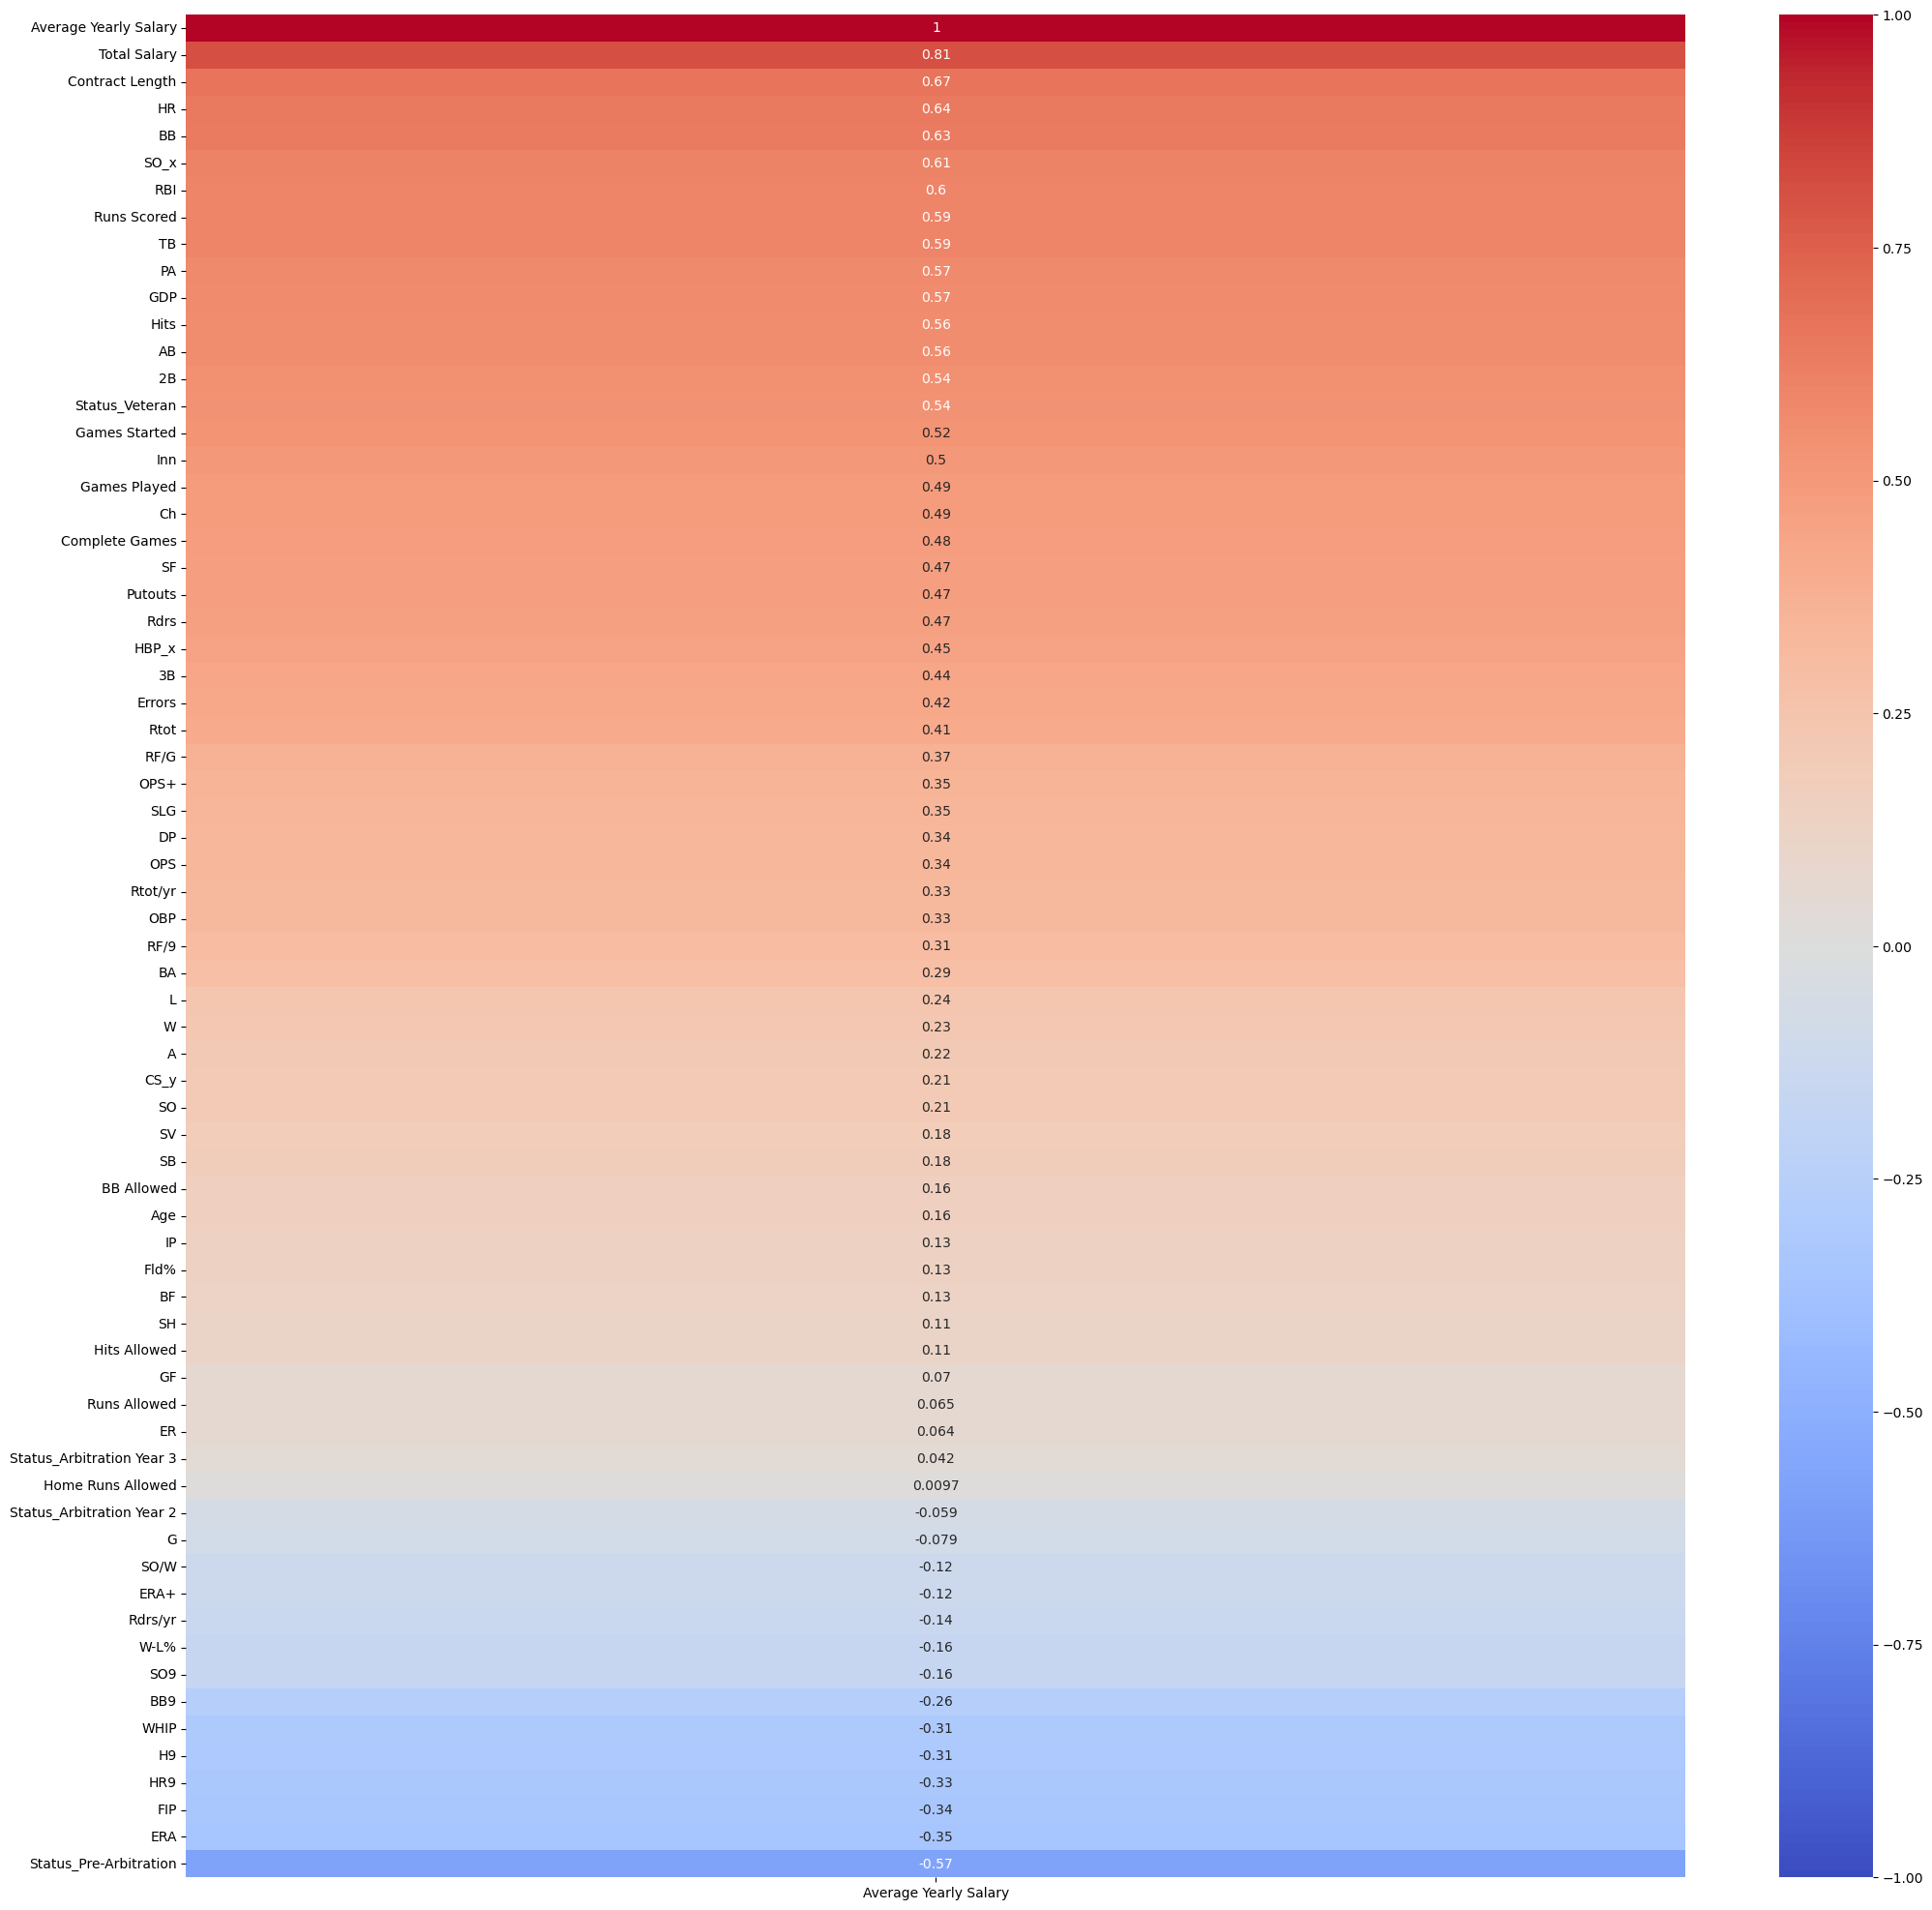

In [52]:
plt.figure(figsize = (25,25))
sns.heatmap(temp_df.corr()[['Average Yearly Salary']].sort_values(by = 'Average Yearly Salary', ascending = False),
            annot = True,
            cmap = 'coolwarm',
            vmin = -1,
            vmax = 1
           );

### Modeling and Determining Features for Models

In [53]:
features = ['Contract Length','HR','Status_Pre-Arbitration','Status_Veteran','ERA','FIP','HR9','H9','WHIP','BB','SO_x']
X = df1[features]
y = df1['Average Yearly Salary']

### Baseline

In [54]:
baseline = df1['Average Yearly Salary'].mean()
predicted_values = np.full_like(df1['Average Yearly Salary'], fill_value=baseline)
r2_score(df1['Average Yearly Salary'], predicted_values)

-5.10702591327572e-15

In [55]:
np.sqrt(mean_squared_error(df1['Average Yearly Salary'], predicted_values))

6336312.9456375

### Linear Regression

In [56]:
lr = LinearRegression()
cross_val_score(lr, X, y, cv = 5).mean()

-1.2257384008169652

In [62]:
#Fit
lr.fit(X, y)

# Make predictions
predicted_values = lr.predict(X)

# Compute RMSE
round(np.sqrt(mean_squared_error(y, predicted_values)))

3863603

### Random Forest Regressor

In [58]:
rf = RandomForestRegressor()
cross_val_score(rf, X, y, cv = 5).mean()

0.031359201249879745

In [59]:
#Fit
rf.fit(X, y)

# Make predictions
predicted_values = rf.predict(X)

# Compute RMSE
np.sqrt(mean_squared_error(y, predicted_values))

1801009.9883152675

### KNN

In [60]:
knn = KNeighborsRegressor()
cross_val_score(knn, X, y, cv = 5).mean()

0.13657061643317087

In [61]:
#Fit
knn.fit(X, y)

# Make predictions
predicted_values = knn.predict(X)

# Compute RMSE
np.sqrt(mean_squared_error(y, predicted_values))

4319588.11457662